## 1.数据收集与整合

In [9]:
# 加载数据分析需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#数据加载和整合
# 加载零售数据集，使用'ISO-8859-1'编码方式
df = pd.read_csv('G:\桌面\Python数据分析与可视化\Basket-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1')
df['SHOP_DATETIME'] = pd.to_datetime(df.SHOP_DATETIME,format='%Y-%m-%d')
df.head()
#数据大小
print(df.shape)
#数据分布情况
df.describe()

(571552, 5)


,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


## 2.数据清洗

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null datetime64[ns]
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 21.8+ MB


In [11]:
# 擦看有无异常值
df.describe()    #BASK_SPEND有复数出现异常，需要处理
#重复值处理
df.duplicated().sum()   #无重复值，不需要处理

0

In [12]:
df=df[df['BASK_SPEND']>=0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569797 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    569797 non-null datetime64[ns]
STORE_CODE       569797 non-null object
POS_NO           569797 non-null int64
BASK_CODE        569797 non-null int64
BASK_SPEND       569797 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 26.1+ MB


In [14]:
#查看空值情况
pd.DataFrame(df.isnull().sum()) #各个列都无空值

,0
SHOP_DATETIME,0
STORE_CODE,0
POS_NO,0
BASK_CODE,0
BASK_SPEND,0


## 3.数据分析及可视化

### 3.1 销售基本数据分析

In [15]:
df.columns

Index(['SHOP_DATETIME', 'STORE_CODE', 'POS_NO', 'BASK_CODE', 'BASK_SPEND'], dtype='object')

In [16]:
# 整体销售情况子数据集，包含下单日期、销售额、销量、利润、年份、月份信息
sales_day = df[['SHOP_DATETIME', 'BASK_SPEND']]

#按照年份、月份对销售子数据集进行分组求和
sales_day = sales_day.groupby(['SHOP_DATETIME']).sum()

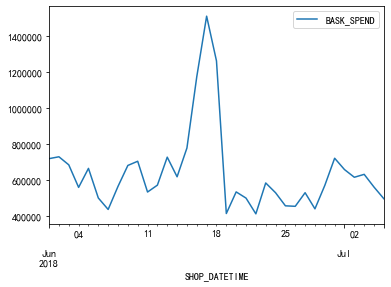

In [17]:
sales_day.plot()

### 3.2 商品基本情况分析

### 销售额前十名的商品

In [18]:
productId_count = df.groupby('STORE_CODE').count()['BASK_SPEND'].sort_values(ascending=False)
print(productId_count.head(10))

STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
Name: BASK_SPEND, dtype: int64


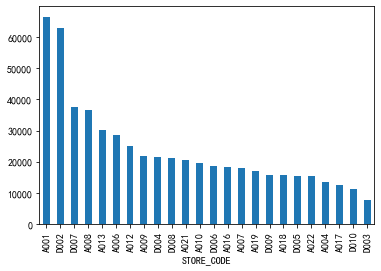

In [19]:
productId_count.plot(kind='bar')

## 3.3 用户下单行为分析

### 3.3.1 用户消费金额、消费次数的描述统计

In [20]:
# 客户消费分析
grouped_Customer = df[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.0
215288,250469,2018-06-01,89.7
215287,161017,2018-06-01,9.9
215286,161158,2018-06-01,4.0
215285,250476,2018-06-01,86.4
...,...,...,...
355739,124578,2018-07-05,23.4
355738,124587,2018-07-05,10.0
355737,141664,2018-07-05,149.8
355819,291779,2018-07-05,7.2


In [21]:
# 用户消费金额、消费次数的描述统计(在此为平均每个用户平均消费金额，不是每笔平均消费金额)
grouped_Customer.count().describe()

,SHOP_DATETIME,BASK_SPEND
count,280816.000000,280816.000000
mean,2.029076,2.029076
std,1.077605,1.077605
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


In [22]:
grouped_Customer['BASK_SPEND'].sum().describe()

count    280816.000000
mean         80.317314
std         282.972947
min           0.010000
25%          20.700000
50%          48.940000
75%          98.700000
max       80064.900000
Name: BASK_SPEND, dtype: float64

### 3.3.2 用户消费金额分布图

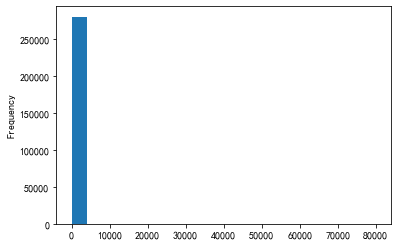

In [23]:
# 用户消费金额分布图
grouped_Customer.sum().BASK_SPEND.plot.hist(bins = 20)

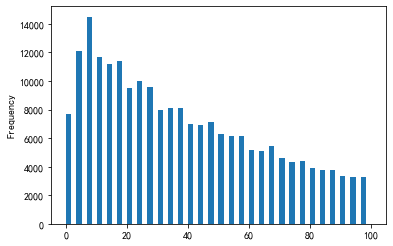

In [24]:
grouped_Customer.sum().query('BASK_SPEND < 100').BASK_SPEND.plot.hist(width=[1.7],bins = 30)

### 3.3.3 用户累计消费占比

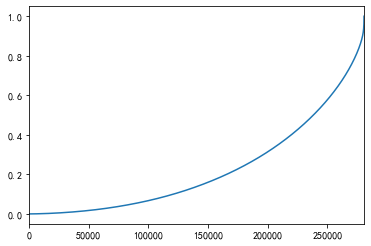

In [25]:
# 用户累计消费占比（百分之多少的用户占百分之多少的销售额）
grouped_Customer.sum().sort_values('BASK_SPEND').apply(lambda x : x.cumsum()/ x.sum()).reset_index().BASK_SPEND.plot()

**购买时间分析**

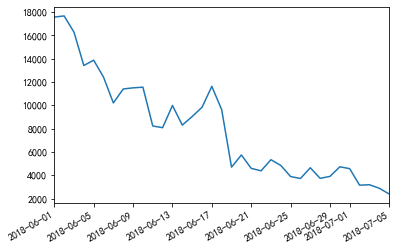

In [26]:
# 用户第一次消费（首购）
grouped_Customer.min().SHOP_DATETIME.value_counts().plot()

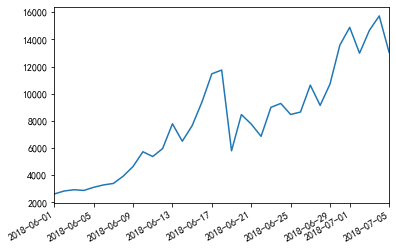

In [27]:
# 用户最后一次消费
grouped_Customer.max().SHOP_DATETIME.value_counts().plot()

### 3.3.4 新老客户消费比

([<matplotlib.patches.Wedge at 0x1b7e0fb5148>,
 [Text(-0.3521304189966928, 1.0421152373980593, 'False'),
  Text(0.35213051656656097, -1.042115204429226, 'True')],
 [Text(-0.19207113763455969, 0.5684264931262142, '60.37%'),
  Text(0.1920711908544878, -0.568426475143214, '39.63%')])

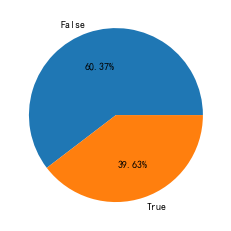

In [28]:
# 多少用户仅消费1次
user_life =grouped_Customer.SHOP_DATETIME.agg(['min','max'])
(user_life['min'] == user_life['max']).value_counts()
# 可视化（饼图）
plt.pie((user_life['min'] == user_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (user_life['min'] == user_life['max']).value_counts().index)

## 3.4 RFM模型分析

### 3.4.1 用户分层

In [29]:
# RFM用户分层
rfm = df.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})

In [30]:
rfm.head()

,BASK_CODE,BASK_SPEND,SHOP_DATETIME
BASK_CODE,,,
961,1,25.0,2018-06-18
962,1,132.1,2018-06-18
964,1,28.0,2018-06-18
965,1,40.0,2018-06-18
966,1,12.5,2018-06-18


In [31]:
rfm['R'] = (rfm.SHOP_DATETIME.max() - rfm.SHOP_DATETIME) / np.timedelta64(1,'D')
rfm.rename(columns={'BASK_CODE':'F','BASK_SPEND':'M'},inplace = True)

In [32]:
rfm

,F,M,SHOP_DATETIME,R
BASK_CODE,,,,
961,1,25.0,2018-06-18,17.0
962,1,132.1,2018-06-18,17.0
964,1,28.0,2018-06-18,17.0
965,1,40.0,2018-06-18,17.0
966,1,12.5,2018-06-18,17.0
...,...,...,...,...
323910,1,9.0,2018-07-05,0.0
323911,1,17.4,2018-07-05,0.0
323912,1,5.9,2018-07-05,0.0


### 3.4.2 建立RFM模型

In [33]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x > 0 else '0')
    label = level.R +level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x : x - x.mean()).apply(rfm_func,axis=1)

In [34]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,24142,390991.43,136245.0
一般保持客户,78408,1245849.52,121598.0
一般发展客户,117098,2568485.95,1965610.0
一般挽留客户,102901,2110018.61,393603.0
重要价值客户,36373,1951109.06,190993.0
重要保持客户,144084,7526893.87,188421.0
重要发展客户,34998,3760221.04,454196.0
重要挽留客户,31793,3000817.29,93646.0


In [35]:
rfm.groupby('label').count()

,F,M,SHOP_DATETIME,R
label,,,,
一般价值客户,7660,7660,7660,7660
一般保持客户,24357,24357,24357,24357
一般发展客户,89623,89623,89623,89623
一般挽留客户,69282,69282,69282,69282
重要价值客户,10875,10875,10875,10875
重要保持客户,39323,39323,39323,39323
重要发展客户,21908,21908,21908,21908
重要挽留客户,17788,17788,17788,17788


In [37]:
# 用户生命周期-新、老、活跃、回流、流失
df['day'] = df.SHOP_DATETIME.values.astype('datetime64[D]')
pivoted_counts = df.pivot_table(index = 'BASK_CODE',
                               columns= 'day',
                               values= 'SHOP_DATETIME',
                               aggfunc= 'count').fillna(0)

In [38]:
pivoted_counts

day,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,...,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05
BASK_CODE,,,,,,,,,,,,,,,,,,,,,
961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
323911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
323912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
# 进行简化
df_purchase = pivoted_counts.applymap(lambda x : 1 if x>0 else 0)

In [40]:
df_purchase 

day,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,...,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05
BASK_CODE,,,,,,,,,,,,,,,,,,,,,
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
def active_statu(data):
    status = []
    for i in range(18):
        # 当月未消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 当月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
                    
    return status

purshase_stats = df_purchase.apply(active_statu,axis=1)
purshase_stats = pd.DataFrame(purshase_stats)[0].apply(pd.Series)
#purshase_stats.columns = pivoted_counts.columns

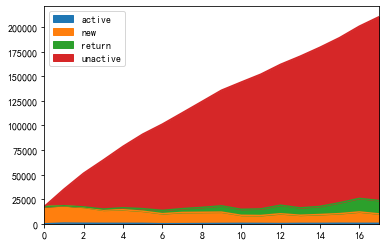

In [42]:
purshase_stats_ct = purshase_stats.replace('unreg',np.NAN).apply(lambda x : pd.value_counts(x))
purshase_stats_ct.fillna(0).T.plot.area()